[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eladrich/pixel2style2pixel/blob/master/notebooks/inference_playground.ipynb)

# Data Scaling function

In [1]:
!git clone https://github.com/riju-jec/Student-engagement.git

Cloning into 'Student-engagement'...
remote: Enumerating objects: 4465, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 4465 (delta 17), reused 32 (delta 13), pack-reused 4429
Receiving objects: 100% (4465/4465), 42.40 MiB | 27.80 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [2]:
%cd /content/Student-engagement

/content/Student-engagement


In [3]:
from AU_mapping import AU_mapping

In [4]:
from ML_classification import ML_classification

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler

def scalingDF(df):
  # scaler = QuantileTransformer(output_distribution='normal')
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(df)
  df_s = pd.DataFrame(scaled,index=df.index, columns=df.columns)
  return df_s

# Load and merge the datasets

In [6]:
import pandas as pd

df0 = pd.read_csv("/content/Student-engagement/WACV data/merged_data0.csv")
df1 = pd.read_csv("/content/Student-engagement/WACV data/merged_data1.csv")
df2 = pd.read_csv("/content/Student-engagement/WACV data/merged_data2.csv")

In [7]:
df00 = df0.loc[df0['confidence'] >= 0.7]
df11 = df1.loc[df1['confidence'] >= 0.7]
df22 = df2.loc[df2['confidence'] >= 0.7]

In [8]:
from sklearn.utils import resample
n = min(len(df00),len(df11),len(df22))
df1_ds = resample(df11, replace=True, n_samples=n, random_state=42)
df2_ds = resample(df22, replace=True, n_samples=n, random_state=42)

In [9]:
df = pd.concat([df00,df11,df22])
# df = pd.concat([df00,df1_ds,df2_ds])

In [10]:
df = df.sample(frac=1)

In [11]:
df_x = df.loc[:,"x0":"AU45_c"]

In [12]:
df_y = df.loc[:,"Label_y"]

In [13]:
df = pd.concat([scalingDF(df_x),df_y],axis=1)

In [14]:
df

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Label_y
306,0.058632,0.018648,0.076677,0.025404,0.055921,0.018735,0.060403,0.021583,0.073718,0.027778,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2
636,0.074919,0.030303,0.089457,0.036952,0.069079,0.030445,0.067114,0.033573,0.086538,0.037037,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
163,0.071661,0.013986,0.092652,0.027714,0.069079,0.018735,0.073826,0.023981,0.092949,0.030093,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2
857,0.058632,0.020979,0.076677,0.034642,0.055921,0.025761,0.063758,0.028777,0.076923,0.034722,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2
992,0.342020,0.377622,0.389776,0.357968,0.348684,0.360656,0.375839,0.338129,0.397436,0.354167,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.068404,0.034965,0.079872,0.036952,0.062500,0.030445,0.060403,0.028777,0.080128,0.037037,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.078176,0.006993,0.079872,0.009238,0.065789,0.009368,0.060403,0.014388,0.076923,0.009259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
867,0.058632,0.009324,0.083067,0.023095,0.059211,0.014052,0.073826,0.023981,0.086538,0.027778,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1
234,0.032573,0.020979,0.073482,0.034642,0.039474,0.023419,0.070470,0.028777,0.080128,0.037037,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0


# AU mapping with engagement labels

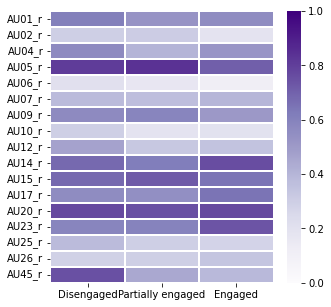

In [15]:
map = AU_mapping()
fig, df_map = map.au_heatmap(df)

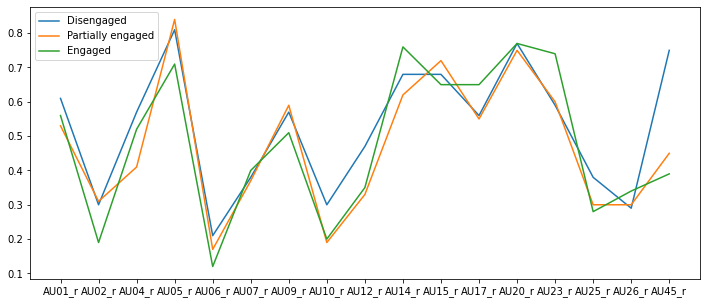

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,5))
for index, row in df_map.T.iterrows():
    plt.plot(row, label=index)
plt.legend()
plt.show()

# Classification with ML models

SET 1: Mediapipe facial landmark
SET 2: Eye Gaze and Head Pose
SET 3: AU
SET 4: All

In [17]:
obj = ML_classification()

In [18]:
training_data=obj.feature_sets(df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


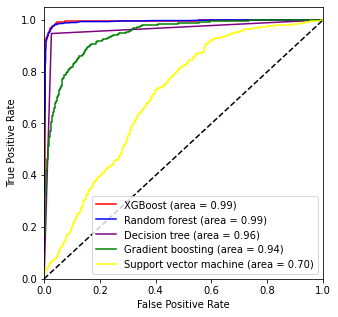

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


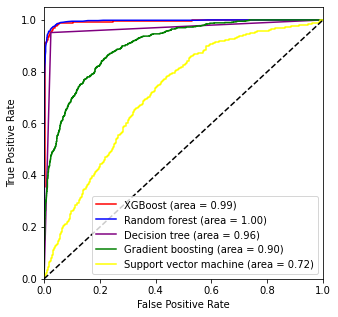

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


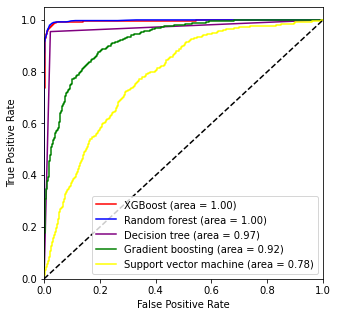

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


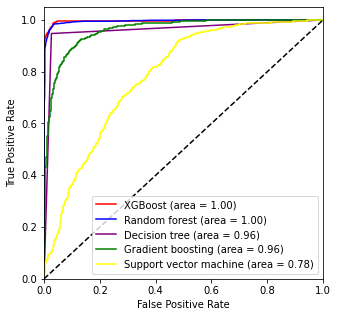

In [19]:
dfML_result=[]
roc_plot=[]
for i in range(4):
  temp , plot= obj.classifier_result(training_data[i])
  dfML_result.append(pd.DataFrame(temp,columns=["Accuracy","Precision","Recall","F-measure"],index=["Random forest","XGBoost","Decision tree","SVM","Gradient Boosting"]).round(decimals=2))
  roc_plot.append(plot)

# ROC

In [20]:
dfML_result[0]

,Accuracy,Precision,Recall,F-measure
Random forest,0.96,0.96,0.96,0.96
XGBoost,0.96,0.96,0.96,0.96
Decision tree,0.95,0.95,0.95,0.95
SVM,0.47,0.52,0.47,0.47
Gradient Boosting,0.82,0.83,0.82,0.82


In [21]:
dfML_result[1]

,Accuracy,Precision,Recall,F-measure
Random forest,0.96,0.96,0.96,0.96
XGBoost,0.95,0.95,0.95,0.95
Decision tree,0.95,0.95,0.95,0.95
SVM,0.44,0.19,0.44,0.44
Gradient Boosting,0.74,0.75,0.74,0.74


In [22]:
dfML_result[2]

,Accuracy,Precision,Recall,F-measure
Random forest,0.97,0.97,0.97,0.97
XGBoost,0.97,0.97,0.97,0.97
Decision tree,0.96,0.96,0.96,0.96
SVM,0.44,0.19,0.44,0.44
Gradient Boosting,0.77,0.78,0.77,0.77


In [23]:
dfML_result[3]

,Accuracy,Precision,Recall,F-measure
Random forest,0.96,0.96,0.96,0.96
XGBoost,0.96,0.96,0.96,0.96
Decision tree,0.95,0.95,0.95,0.95
SVM,0.47,0.52,0.47,0.47
Gradient Boosting,0.85,0.85,0.85,0.85


In [27]:
dfML_result[3].to_csv("result_s4.csv")

In [32]:
roc_plot[3].savefig("roc_plot_s4.pdf")